In [20]:
import pickle
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
obs = None
with open('obs.json') as f:
    obs = json.load(f)

res = None
with open('res.json') as f:
    res = json.load(f)

In [4]:
xObs = []
yObs = []
for k, v in obs.items():
    vals = v.copy()
    del vals['obstruction']
    xObs.append(list(vals.values()))
    yObs.append(v['obstruction'] / 4)

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)
print(
    "X Train: ", len(xObsTrain),
    "\nX Val: ", len(xObsVal),
    "\nY Train: ", len(yObsTrain),
    "\nY Val: ", len(yObsVal)
)

X Train:  981 
X Val:  327 
Y Train:  981 
Y Val:  327


In [5]:
xRes = []
yRes = []

for k, v in res.items():
    vals = v.copy()
    del vals['restriction']
    xRes.append(list(vals.values()))
    yRes.append(v['restriction'])

xResTrain, xResVal, yResTrain, yResVal = train_test_split(xRes, yRes, test_size=0.25, random_state=23)
print(
    "X Train: ", len(xResTrain),
    "\nX Val: ", len(xResVal),
    "\nY Train: ", Counter(yResTrain),
    "\nY Val: ", Counter(yResVal)
)

X Train:  981 
X Val:  327 
Y Train:  Counter({0: 969, 1: 12}) 
Y Val:  Counter({0: 318, 1: 9})


In [14]:
if os.path.exists('modelObs.pkl'):
    with open('modelObs.pkl', 'rb') as f:
        modelObs = pickle.load(f)

if os.path.exists('modelRes.pkl'):
    with open('modelRes.pkl', 'rb') as f:
        modelRes = pickle.load(f)

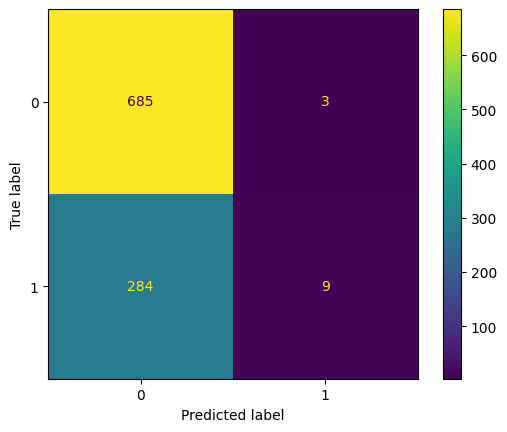

In [31]:
trainPred = modelRes.predict(xResTrain)
valPred = modelRes.predict(xResVal)

cm = confusion_matrix(trainPred, yResTrain)
ConfusionMatrixDisplay(cm).plot()